# Imports

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Variáveis Globais

In [2]:
exer=["1","2","3","4"]

file_path = "C:\\Users\\lopes\\Desktop\\Apple watch\\Exercicio"

users1=["AntonioC","GusC","DarC"]

repetition=["R1","R2","R3","R4"]

pesos=["3kg","5kg"]

# Funções Definidas

In [3]:
def getMedian(vs):
    if (len(vs)==0):
        return 0
    return (np.median(vs))

In [7]:
X = []
Y = []
CV_Pesos = []
CV_Utilizadores = []
CV_Repeticao = []
tW=list(np.arange(-2.5,2.5+0.125,0.1))
tStep=0.1

for ixb, ex in enumerate(exer):
                for ixa,ps in enumerate(pesos):
                        for ixu,us in enumerate(users1):             
                            for ixc,cl in enumerate(repetition):       
                                print("Exer Nº",ex," the user user is ",us," try nº ",cl," peso: ",ps)
                                data_input = pd.read_csv(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".txt", skiprows=1, header=None, sep='\s+',
                                                         names=["TimeStep","Dias","Segundos","XACC","YACC","ZACC","XGYR","YGYR","ZGYR"])
                                tMax_input= data_input["Segundos"].iloc[-1]
                                data_output = pd.read_excel(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".xlsx",header=0,sheet_name='Serie 1')
                                tMax_output = data_output["Tiempo (s)"].iloc[-1]
                                offset_scene = float(open(file_path+ex+"\\"+us+ex+"_"+cl+"_"+ps+".txt").readline().split('=')[1])
                                print("Offset Inicial = ",offset_scene)
                                
                                print("Tempo Input = ",tMax_input," Tempo Output = ",tMax_output)
                                tMaxMin=min(tMax_input,tMax_output)
                 
                                for t in np.arange(0-min(tW),tMaxMin-max(tW),tStep): #len = 131
                                    xi=[]
                                       
                                    xi1=[]
                                    xi2=[]
                                    xi3=[]
                                    xi4=[]
                                    xi5=[]
                                    xi6=[]
                                    Tempos = []
                                    for it in range(0,len(tW)-2,1): #len = 50
                        
                                            tr=t
                        
                                            t0=tr+tW[it]
                                            tN=tr+tW[it+1]                                         
                                            ag1=data_input.iloc[np.where((data_input["Segundos"] >= t0+offset_scene ) & (data_input["Segundos"] <=  tN+offset_scene))]
                        
                                            Tempos.append(t0)
                                            Tempos.append(tN)
                        
                                            xi1.append(getMedian(ag1.iloc[:,3]))
                                            xi2.append(getMedian(ag1.iloc[:,4]))
                                            xi3.append(getMedian(ag1.iloc[:,5]))
                                            xi4.append(getMedian(ag1.iloc[:,6]))
                                            xi5.append(getMedian(ag1.iloc[:,7]))
                                            xi6.append(getMedian(ag1.iloc[:,8]))  
                                    
                                    xi.append(xi1)
                                    xi.append(xi2)
                                    xi.append(xi3)
                                    xi.append(xi4)
                                    xi.append(xi5)
                                    xi.append(xi6)
                                 
                                    # list of len 6,51 --> [[ACCX],[ACCY],[ACCZ],[GYRX],[GYRY],[GYRZ]]
                                    X.append(np.transpose(xi))
                                    Y.append(ixb)
                                    CV_Pesos.append(ixa)
                                    CV_Utilizadores.append(ixu)
                                    CV_Repeticao.append(ixc)
                
                                print("----------------------------------")
                                                    #                            it = 49              """             it = 0
X=np.array(X)                                       # matrix t=1   [[ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX],          , [ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX]]
Y=np.array(Y)                                       #       """
CV_Pesos = np.array(CV_Pesos)                       #        t=max [[ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX],          , [ACCX,ACCY,ACCZ,GYRX,GYRX,GYRX]]
CV_Utilizadores = np.array(CV_Utilizadores) 
CV_Repeticao = np.array(CV_Repeticao) 
        
print(X.shape,Y.shape,CV_Pesos.shape,CV_Utilizadores.shape,CV_Repeticao.shape)

Exer Nº 1  the user user is  AntonioC  try nº  R1  peso:  3kg
Offset Inicial =  1.4000000000000012
Tempo Input =  37.525  Tempo Output =  34.684
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R2  peso:  3kg
Offset Inicial =  1.7000000000000015
Tempo Input =  37.574  Tempo Output =  34.312
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R3  peso:  3kg
Offset Inicial =  1.4000000000000012
Tempo Input =  36.143  Tempo Output =  33.261
----------------------------------
Exer Nº 1  the user user is  AntonioC  try nº  R4  peso:  3kg
Offset Inicial =  1.3000000000000012
Tempo Input =  37.149  Tempo Output =  34.192
----------------------------------
Exer Nº 1  the user user is  GusC  try nº  R1  peso:  3kg
Offset Inicial =  0.8000000000000007
Tempo Input =  28.364  Tempo Output =  25.972
----------------------------------
Exer Nº 1  the user user is  GusC  try nº  R2  peso:  3kg
Offset Inicial =  0.9000000000000008
Tempo Inp

In [8]:
Y=to_categorical(Y)

In [14]:
def ResultadosClassificacao(X,Y,S):
        for ixs,sc in enumerate(np.unique(S)):
            
            train_index=np.where(S != sc)[0]
            test_index=np.where(S == sc)[0]
        
            np.random.shuffle(train_index)
            
            print("SCENE", sc, " TRAIN:", train_index, " TEST:", test_index)
            x_train, x_val = np.copy(X[train_index]), np.copy(X[test_index])
            y_train, y_val = np.copy(Y[train_index]), np.copy(Y[test_index])
        
            for ixv in range(0,X.shape[2]):
                min_v=min(x_train[:,:,ixv].flatten())
                max_v=max(x_train[:,:,ixv].flatten())
                print("min_v,max_v:",min_v,max_v,x_train[:,:,ixv])
                x_train[:,:,ixv]=(x_train[:,:,ixv]-min_v)/(max_v-min_v)
                x_val[:,:,ixv]=(x_val[:,:,ixv]-min_v)/(max_v-min_v)
            
            model = Sequential([
                Input(shape=(X.shape[1], X.shape[2])),  
                Conv1D(filters=16, kernel_size=2, activation='relu'),
                Conv1D(filters=32, kernel_size=3, activation='relu'),
                Dropout(0.25),
                Conv1D(filters=64, kernel_size=3, activation='relu'),
                Conv1D(filters=128, kernel_size=3, activation='relu'),
                Dropout(0.25),
                LSTM(256, return_sequences=True),
                Dropout(0.25),
                LSTM(256),
                Flatten(),
                Dense(2048, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(4, activation='softmax') 
            ])
            
            model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
            
            history = model.fit(x_train, y_train, batch_size=16, epochs=16, validation_data=(x_val, y_val))
  
            y_pred = model.predict(x_val).argmax(axis=1)
            y_val=y_val.argmax(axis=1)
            print(y_pred)
            print(y_val)
            
            cm = confusion_matrix(y_val, y_pred) 
            print(cm)
            print('Classification Report SCENE ',sc)
            print(classification_report(y_val, y_pred, target_names=exer))
            
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=exer)  
            disp.plot(cmap=plt.cm.Blues)
            plt.show()


# Cross Validation Pesos

SCENE 0  TRAIN: [ 4072 13447 13280 ...  2787 10285  8247]  TEST: [    0     1     2 ... 18286 18287 18288]
min_v,max_v: -10.30337429 17.3195848465 [[-0.41074587 -0.65144533 -0.66461796 ...  3.33386731  8.1215117
  10.2434988 ]
 [-0.99872321 -1.17954719 -0.54127443 ... -1.65735364 -1.77830207
  -4.47269917]
 [-4.30864048 -3.50870371 -1.64418095 ... -1.22864509 -1.98786628
  -3.14705586]
 ...
 [ 0.7951465   0.28021729 -0.32332765 ...  0.88615727  0.37841311
  -0.62031007]
 [ 2.49561048  0.56761968 -2.08845711 ... -1.82739997  0.99393314
   1.13523936]
 [-3.61887455 -5.00798607 -5.76002216 ... -5.15887213 -5.059479
  -4.07392836]]
min_v,max_v: -36.39950943 25.296197891 [[ -6.69887018  -6.97429705 -10.48419857 ...  -5.96719146  -6.51086092
   -8.44244385]
 [ -8.70110607 -10.99553537  -9.95130634 ... -10.31055927  -7.84249163
   -8.19695473]
 [ -9.95370197 -11.19072914  -9.74892759 ...  -8.77535152  -9.47829008
   -8.86157227]
 ...
 [ -9.42799521  -8.89989281  -9.17292547 ...  -9.08670425  

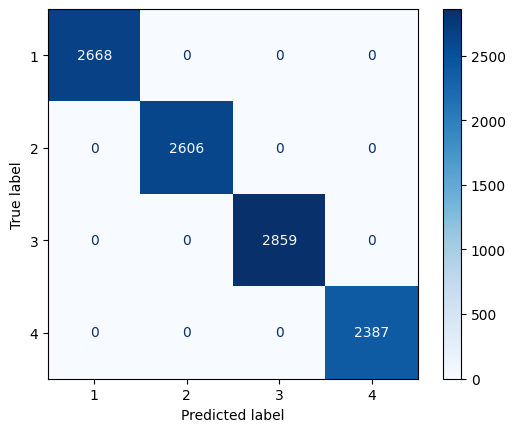

SCENE 1  TRAIN: [  384  5294  2541 ... 12687 13041 10853]  TEST: [ 2668  2669  2670 ... 20621 20622 20623]
min_v,max_v: -8.626860619 14.942527771 [[ 0.47181886  1.45377696  2.70756972 ...  2.42016733  4.72058392
   5.27622843]
 [-3.16142583 -3.91346216 -1.84177005 ...  1.62142831  1.33881599
   1.72441411]
 [ 3.90867209  1.68609381 -1.15679443 ...  9.17412233  8.43525886
   6.14083028]
 ...
 [ 1.01668581  0.85981202 -0.07185059 ... -0.92208254 -1.21547246
  -1.46335703]
 [-0.26464967 -0.39757326 -1.03464846 ... -3.88112926 -6.7874856
  -6.60187149]
 [-2.20461559 -2.55428839 -2.18425787 ... -1.1999048   1.75914186
  -2.91234398]]
min_v,max_v: -29.578493118 14.4587335585 [[ -5.87258816  -6.04981947  -8.28317547 ...  -5.7516396   -8.24605274
  -11.83618736]
 [ -9.35494709  -9.41362476 -11.57273483 ... -10.58957958 -10.94643688
  -11.07217598]
 [ -6.0450294   -1.44419682  -4.72417632 ... -11.66015291 -17.68243027
  -15.18801737]
 ...
 [-10.46982861  -9.4866724   -9.46751308 ... -10.4997663

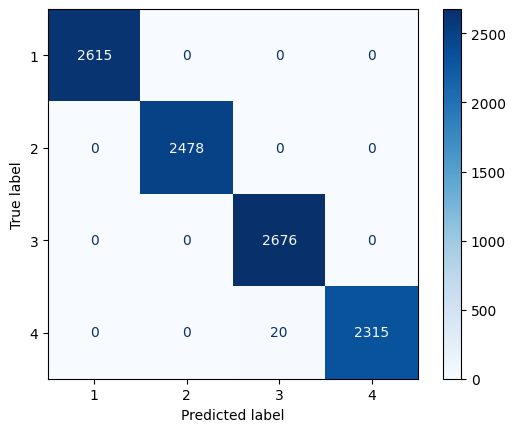

In [15]:
ResultadosClassificacao(X,Y,CV_Pesos)

# Cross Validation Utilizadores

SCENE 0  TRAIN: [ 7826  4966  6787 ...  4407  6804 15123]  TEST: [    0     1     2 ... 19260 19261 19262]
min_v,max_v: -10.30337429 17.3195848465 [[ 2.73271751  2.31119394  3.81406867 ...  2.76265514  0.91250247
  -1.68130374]
 [ 9.69264412  6.53960109  4.22002459 ...  1.55796027  4.15296411
   5.62829614]
 [-3.76377332 -3.48235846 -2.40220463 ...  5.01996136  4.5205996
   4.05955839]
 ...
 [-0.5460645   0.37122804  4.32061529 ...  7.06650543 10.22433853
  11.50806952]
 [-2.92671394 -3.56259179 -2.98898458 ...  4.18170428  4.93134546
   4.46072412]
 [ 0.68856814  0.22752686 -0.14849121 ...  1.7842896   1.08614144
   0.97716802]]
min_v,max_v: -36.39950943 25.296197891 [[-11.24940682 -13.28876638 -14.79882622 ... -11.4350214   -8.41609859
   -6.95992708]
 [-11.2086916   -5.98515391  -5.48220015 ...  -3.95537496  -0.74485111
   -3.788921  ]
 [ -1.97828621  -1.66932869  -6.25698876 ...  -9.48188305 -10.86620426
  -11.93198776]
 ...
 [ -7.41498089  -3.62366462  -4.67268324 ... -12.51876736

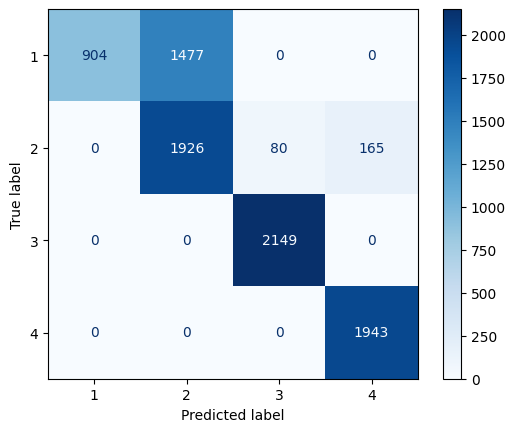

SCENE 1  TRAIN: [10008 17995  6329 ... 18988  3356  7651]  TEST: [ 1162  1163  1164 ... 20129 20130 20131]
min_v,max_v: -10.30337429 17.3195848465 [[ 1.02027839  3.07760024  4.50503206 ...  1.05141365  4.85590243
   3.51828384]
 [-3.49912357 -3.70030534 -2.16988778 ...  0.96998295  0.25387207
  -0.13651612]
 [ 0.7592212   1.65974855  2.10043216 ...  2.18904793  2.28724384
   2.69679213]
 ...
 [-2.16150522 -1.343606   -2.51237559 ... -2.64649665 -2.41178489
  -3.11831558]
 [-0.24908204 -0.51971924  0.17244141 ... -0.01676514  0.28620484
   1.53880012]
 [ 0.57240968 -2.90515876 -3.81646371 ...  2.51596808  3.96854758
   2.6417067 ]]
min_v,max_v: -36.39950943 25.296197891 [[-16.32804584 -11.92719746 -15.94843578 ...  -4.12182856 -10.20757389
  -16.71723747]
 [ -8.23886776  -6.46655297  -8.59812069 ...  -9.09867954  -9.82676601
  -11.2134819 ]
 [-10.17643833  -9.46272278  -9.82556772 ...  -9.1453824  -10.69615745
   -9.84113598]
 ...
 [ -8.54183769  -9.39326668  -8.74661159 ...  -9.0088667

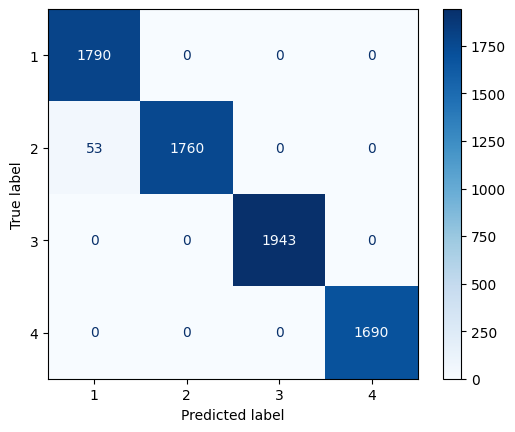

SCENE 2  TRAIN: [12096  7098 11322 ... 18600 14660 16402]  TEST: [ 2001  2002  2003 ... 20621 20622 20623]
min_v,max_v: -8.168214321499999 15.065871239 [[ 0.95800787  1.12086916  2.3614893  ... -0.19160156 -0.97956306
  -0.55564454]
 [ 3.17579603  4.11344612  2.52195573 ...  0.43709111  2.9111464
   2.3758595 ]
 [-2.61416388 -2.10282731 -1.86811531 ... -3.70988536 -3.57576442
  -2.69200206]
 ...
 [-2.46926522 -3.38895273 -3.41170549 ... -2.76145756 -3.80568624
  -2.83809817]
 [-0.25147706  0.19160157 -0.12094849 ...  0.20836671 -0.73886356
  -0.55564457]
 [-1.26816291 -1.65016854 -1.90643561 ... -2.43333995 -3.31470716
  -3.13029075]]
min_v,max_v: -18.074015617500002 4.660708427 [[ -7.68561792  -7.89637995 -11.04583073 ...  -9.34536648  -9.6040287
   -9.32261419]
 [-15.07185841 -12.46008968  -8.66518116 ... -10.57161665  -9.06514931
  -11.92121029]
 [-10.26265907  -9.19687557  -9.44116735 ...  -8.89390564  -8.83522701
   -9.23519611]
 ...
 [ -8.87354755  -8.71667433  -8.80768442 ...  -

C:\Users\lopes\anaconda3\envs\Tese\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lopes\anaconda3\envs\Tese\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lopes\anaconda3\envs\Tese\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


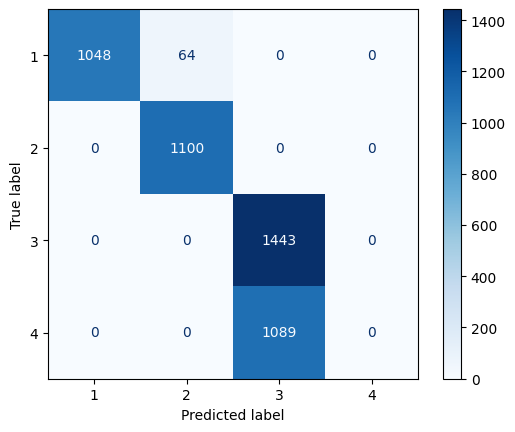

In [18]:
ResultadosClassificacao(X,Y,CV_Utilizadores)

# Cross Validation Repeticoes 

SCENE 0  TRAIN: [ 1436 10001  3646 ... 15657  9607  8160]  TEST: [    0     1     2 ... 20269 20270 20271]
min_v,max_v: -10.30337429 17.3195848465 [[ 0.7460486   1.29690313  0.22752686 ... 11.09732342  8.87714052
   6.19352055]
 [ 4.24277735  0.07903565 -2.04295182 ...  3.75539088  3.6452198
   3.93980742]
 [ 6.19112587  9.81359291 12.81575012 ... 10.25906658  8.00894547
   6.99345732]
 ...
 [-1.07296884 -0.46702883 -0.42751101 ... -4.83554459 -7.08686304
  -5.09899664]
 [-4.15176654 -2.00223637 -1.00590825 ...  2.04534674  3.02011967
   0.03472778]
 [-0.56043458 -1.9172132  -2.95066428 ... -5.78277493 -5.90132832
  -5.43429971]]
min_v,max_v: -36.39950943 25.296197891 [[ -6.54798365  -2.2022205   -6.38751745 ...  -7.03417277  -7.83410907
   -5.92288351]
 [-11.43861389  -6.92639685   2.16030765 ... -18.2859745  -16.0322609
  -11.51285934]
 [ -6.17915058  -7.03417277 -11.33802271 ...  -9.98842955 -12.296031
  -11.4913044 ]
 ...
 [ -9.74054527  -6.10011506 -10.0303421  ...  -6.74437523  -

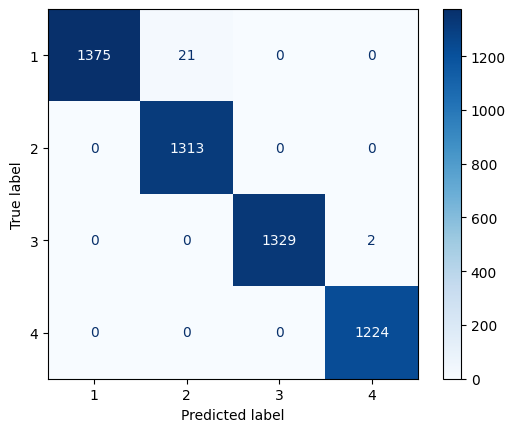

SCENE 1  TRAIN: [ 8706  6486 19489 ...  2175  2475 12898]  TEST: [  296   297   298 ... 20389 20390 20391]
min_v,max_v: -10.30337429 17.3195848465 [[-4.65951085 -5.02714634 -3.4320631  ... -3.65719509 -4.12422383
  -1.67771125]
 [-0.38080812  0.81071413  1.67771125 ...  3.93860984  3.73862577
   3.65000987]
 [-5.46423745 -3.81287122 -1.37953126 ... -1.22864503 -1.35079104
   0.10538086]
 ...
 [ 3.71467543  1.75075936  1.03225349 ...  0.97597051  4.20565438
   7.84847927]
 [ 5.28341341  2.91593647  2.40699482 ... 10.85662365  7.99218035
   8.03289604]
 [-0.98435307 -2.83570314 -4.43916893 ...  0.53049684  0.5843848
  -0.08143067]]
min_v,max_v: -36.39950943 25.296197891 [[ -7.94787288 -10.85901928  -9.87107372 ...  -8.76577187 -12.25890779
  -14.50902891]
 [-11.04343557 -10.24589395 -11.84097719 ... -10.31534958 -11.12726116
  -11.6397953 ]
 [-10.34648466 -10.52371645  -8.67236614 ...  -9.78964281  -8.89151001
  -10.3129549 ]
 ...
 [ -7.6544826   -8.24365711  -4.4499464  ...  -3.91585708

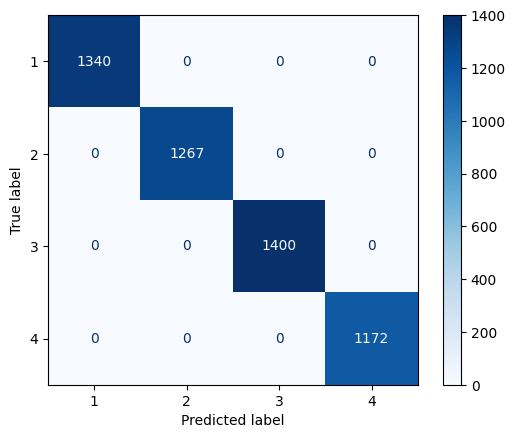

SCENE 2  TRAIN: [16166  1563 18255 ...  7405 10508 13653]  TEST: [  589   590   591 ... 20508 20509 20510]
min_v,max_v: -10.30337429 17.199833869499997 [[-3.08718038 -2.90036869 -2.6033864  ... -3.78053844 -2.08606219
  -0.65144533]
 [ 7.09165335 11.89965534 10.1668582  ...  2.40938973  0.11136842
  -0.05029541]
 [-3.64162743 -3.772156   -2.92551649 ...  0.18681154 -2.30760133
  -4.64274549]
 ...
 [-2.17707276 -3.06083512 -1.68369877 ...  2.0345692   5.46303987
   2.41178489]
 [-4.38767576 -1.10170905 -4.22241974 ... -2.73271751 -3.19495618
  -3.34105229]
 [-2.52435064 -1.66932869 -3.4392482  ... -0.83705935 -2.46208024
  -1.32564339]]
min_v,max_v: -36.39950943 18.333875656500002 [[ -9.20885086  -9.59205341  -9.01006412 ...  -9.73096466 -11.2086916
   -9.64474392]
 [ -6.72042513  -7.56347203  -9.16334534 ...  -5.57919836  -6.23782873
   -6.44020796]
 [ -7.75986362  -7.29522991 -10.95601702 ... -10.95601749  -9.97166443
   -7.05213523]
 ...
 [ -0.29937744  -0.76880133  -5.09660196 ... -

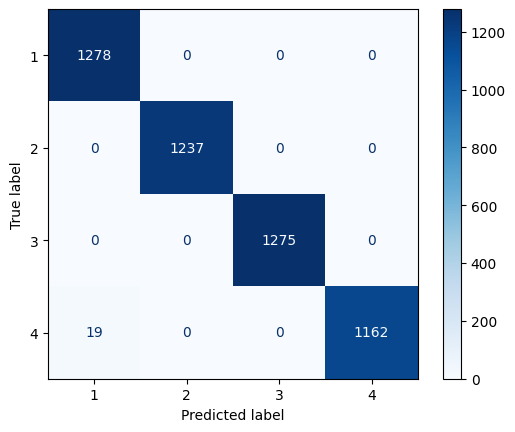

SCENE 3  TRAIN: [   50 15033  4371 ...  7575  8280 19649]  TEST: [  871   872   873 ... 20621 20622 20623]
min_v,max_v: -9.122630119499998 17.3195848465 [[ 8.18737459  8.77535152  8.72146416 ...  7.95386004  7.63891506
   6.41146755]
 [ 2.13875246  1.10649905  1.89446056 ...  0.39038819 -0.41074587
  -1.16637456]
 [ 4.43437886  7.72872829  9.00287867 ...  7.93470001  6.35877705
   3.01293469]
 ...
 [-2.52315319 -3.22130132  1.11368418 ...  5.65224648  0.91968757
  -1.50646734]
 [ 1.41306162  1.53041756  1.86452276 ...  0.86460209  1.33282843
   1.37953126]
 [-0.90890995 -0.12454102 -0.06706055 ... -0.88974982  0.28979737
   0.81191164]]
min_v,max_v: -29.578493118 25.296197891 [[ -8.50950479  -8.40412426  -7.87961459 ...  -9.02203894  -8.78732681
   -8.4376545 ]
 [ -8.85678291 -10.28900433 -10.39438534 ... -10.41594028  -9.20765305
   -9.29986095]
 [ -7.01261759  -6.76593065  -7.78620887 ...  -9.03161859  -7.15512109
   -7.62933493]
 ...
 [ -0.45984377  -7.46527624  -9.9824419  ... -11.

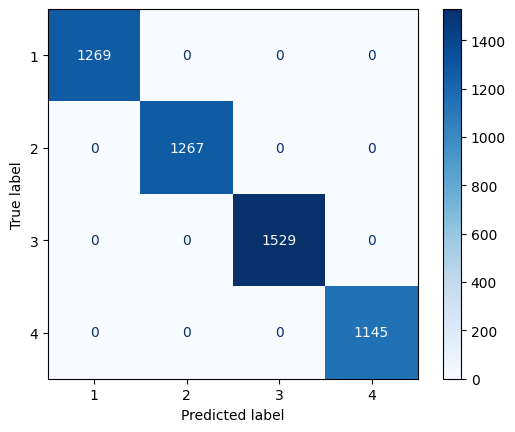

In [17]:
ResultadosClassificacao(X,Y,CV_Repeticao)